In [5]:
import pandas as pd
import matplotlib.pyplot as plt #Scatterplot

Ingesting the data

In [6]:
#The data is placed in an folder so we load the data through the folder with \
data1 = pd.read_excel("wine-data\winequality-red.xlsx", header=1)
data2 = pd.read_excel("wine-data\winequality-white.xlsx", header=1)

Aggregating the data together into one data file - but first we add a column named type

In [7]:
#Adding the type
data1["type"] = "red"
data2["type"] = "white"

# Merge/concatenate - the ignore_index resets the index numbers
wine = pd.concat([data1, data2], ignore_index=True)

In [8]:
#Shows a random sample, to show that the data is mixed
wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
743            11.6             0.410         0.58             2.8      0.096   
4695            6.8             0.130         0.39             1.4      0.034   
5538            6.2             0.270         0.32             6.3      0.048   
5347            6.2             0.240         0.25            12.5      0.055   
5032            6.2             0.255         0.27             1.3      0.037   
768             7.1             0.590         0.02             2.3      0.082   
100             8.3             0.610         0.30             2.1      0.084   
3541            8.3             0.360         0.57            15.0      0.052   
2747            7.0             0.170         0.37             5.7      0.025   
5786            5.9             0.240         0.34             2.0      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
743                  25.0                 101.0  1.00024  3.13       0.53   
4695                 19.0                 102.0  0.99121  3.23       0.60   
5538                 47.0                 159.0  0.99282  3.21       0.60   
5347                 47.0                 134.0  0.99758  3.30       0.51   
5032                 30.0                  86.0  0.98834  3.05       0.59   
768                  24.0                  94.0  0.99744  3.55       0.53   
100                  11.0                  50.0  0.99720  3.40       0.61   
3541                 35.0                 256.0  1.00010  2.93       0.64   
2747                 29.0                 111.0  0.99380  3.20       0.49   
5786                 40.0                 108.0  0.98948  3.19       0.50   

      alcohol  quality   type  
743      10.0        5    red  
4695     11.3        7  white  
5538     11.0        6  white  
5347      9.0        5  white  
5032     12.9        7  white  
768       9.7        6    red  
100      10.2        6    red  
3541      8.6        5  white  
2747     10.8        6  white  
5786     12.3        6  white

Cleaning the data

In [9]:
#We use shape to show the size of the dataset, through the number of observations and how many variables there are
wine.shape

(6497, 13)

In [10]:
#Finding missing values (null) - It shows how many of the different variables has null values
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


Since there are no null values, we do not need to drop them

In [11]:
#Shows how many duplicated values there are. It compares all of the columns.
wine.duplicated().sum()

np.int64(1177)

We therefore have 1177 duplicates

In [12]:
#This shows the first five duplicates.
duplicates = wine[wine.duplicated()]
print(duplicates.head())

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4             7.4             0.700         0.00            1.90      0.076   
11            7.5             0.500         0.36            6.10      0.071   
27            7.9             0.430         0.21            1.60      0.106   
40            7.3             0.450         0.36            5.90      0.074   
65            7.2             0.725         0.05            4.65      0.086   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                  11.0                  34.0   0.9978  3.51       0.56   
11                 17.0                 102.0   0.9978  3.35       0.80   
27                 10.0                  37.0   0.9966  3.17       0.91   
40                 12.0                  87.0   0.9978  3.33       0.83   
65                  4.0                  11.0   0.9962  3.41       0.39   

    alcohol  quality type  
4       9.4        5  red  
11     10.5       

In [13]:
#Dropping the 1177 duplicates and resetting the index
wine.drop_duplicates(inplace=True, ignore_index=True)

Checking for damaged values

In [14]:
#Negative values - 
(wine.drop(columns="type") < 0).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
#pH value 7 or bigger for wine, as wine is acid and 7 is neutral - 
wine[(wine['pH']>7)].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                   0
type                      0
dtype: object

The outliers for the "accepted" wine values

In [16]:
def check_min_max(list, expected_range):
    report = []
    for col, (min_val, max_val) in expected_range.items():
        count = ((list[col] < min_val) | (list[col] > max_val)).sum()
        report.append({"column": col, "outliers": count})

    report_df = pd.DataFrame(report)
    print(report_df)

In [17]:
#Our expected ranges for red wine
expected_ranges_red = {
    "fixed acidity": (4.6, 15.9),
    "volatile acidity": (0.12, 1.58),
    "citric acid": (0.0, 1.0),
    "residual sugar": (0.9, 15.5),
    "chlorides": (0.012, 0.611),
    "free sulfur dioxide": (1, 72),
    "total sulfur dioxide": (6, 289),
    "density": (0.99007, 1.00369),
    "pH": (2.74, 4.01),
    "sulphates": (0.33, 2.0),
    "alcohol": (8.4, 14.9),
    "quality": (3, 8)
}
red_wine = wine[wine["type"] == "red"]

check_min_max(red_wine, expected_ranges_red)

                  column  outliers
0          fixed acidity         0
1       volatile acidity         0
2            citric acid         0
3         residual sugar         0
4              chlorides         0
5    free sulfur dioxide         0
6   total sulfur dioxide         0
7                density         0
8                     pH         0
9              sulphates         0
10               alcohol         0
11               quality         0


In [18]:
#Our expected ranges for white wine
expected_ranges_white = {
    "fixed acidity": (3.8, 14.2),
    "volatile acidity": (0.08, 1.10),
    "citric acid": (0.0, 1.66),
    "residual sugar": (0.6, 65.8),
    "chlorides": (0.009, 0.346),
    "free sulfur dioxide": (2, 289),
    "total sulfur dioxide": (9, 440),
    "density": (0.98711, 1.03898),
    "pH": (2.72, 3.82),
    "sulphates": (0.22, 1.08),
    "alcohol": (8.0, 14.2),
    "quality": (3, 9)
}

#Right now we are only checking for the values of white wine, so we need to filter on the type of wine
white_wine = wine[wine["type"] == "white"]

check_min_max(white_wine, expected_ranges_white)

                  column  outliers
0          fixed acidity         0
1       volatile acidity         0
2            citric acid         0
3         residual sugar         0
4              chlorides         0
5    free sulfur dioxide         0
6   total sulfur dioxide         0
7                density         0
8                     pH         0
9              sulphates         0
10               alcohol         0
11               quality         0


In [19]:
#Shows the count, mean std fopr the collective winelist
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     5.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [20]:
#Description of red wine - the list is made previously: red_wine = wine[wine["type"] == "red"]
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [21]:
#Description of white wine - the list is made previously: white_wine = wine[wine["type"] == "white"]
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [22]:
#The shape of red wine after cleaning
red_wine.shape

(1359, 13)

In [23]:
#The shape of white wine after cleaning
white_wine.shape

(3961, 13)

In [24]:
#Pre Label encoding - Categorical Encoding
wine.dtypes

wine["type"] = wine["type"].astype("category")

wine.dtypes

cat_data = wine.select_dtypes('category').columns

cat_data

# print these columns only
wine[cat_data].sample(10)

categorical_data = wine[cat_data]
categorical_data

type
0       red
1       red
2       red
3       red
4       red
...     ...
5315  white
5316  white
5317  white
5318  white
5319  white

[5320 rows x 1 columns]

In [25]:
# Label Endcoding which is converting the text values into numerical values

cats = categorical_data["type"].unique()
cats

categorical_data = wine[["type"]].copy()
categorical_data["type_encoded"] = categorical_data["type"].cat.codes
categorical_data.sample(10)

type  type_encoded
5123  white             1
4415  white             1
4712  white             1
2852  white             1
5139  white             1
2332  white             1
882     red             0
4151  white             1
3311  white             1
5301  white             1

In [26]:
# adding the encoded column to the original dataframe and dropping the text column
# White wine = 1 and red wine = 0
wine["type_encoded"] = wine["type"].cat.codes
wine.drop(["type"], axis=1).sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
597             7.4             1.185         0.00            4.25      0.097   
3936            6.9             0.220         0.43            6.40      0.042   
4526            7.2             0.230         0.82            1.30      0.149   
4095            6.6             0.425         0.25            2.35      0.034   
634             7.3             0.835         0.03            2.10      0.092   
5186            6.1             0.260         0.25            2.90      0.047   
5240            5.4             0.375         0.40            3.30      0.054   
2728            7.0             0.140         0.49            5.90      0.053   
1893            5.8             0.335         0.14            5.80      0.046   
4757            7.1             0.380         0.42           11.80      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
597                   5.0                  14.0  0.99660  3.63       0.54   
3936                 34.0                 115.0  0.99293  3.05       0.51   
4526                 70.0                 109.0  0.99304  2.93       0.42   
4095                 23.0                  87.0  0.99082  3.05       0.41   
634                  10.0                  19.0  0.99660  3.39       0.47   
5186                289.0                 440.0  0.99314  3.44       0.64   
5240                 29.0                 147.0  0.99482  3.42       0.52   
2728                 22.0                 118.0  0.99540  3.36       0.36   
1893                 49.0                 197.0  0.99370  3.30       0.71   
4757                 32.0                 193.0  0.99624  3.04       0.49   

      alcohol  quality  type_encoded  
597      10.7        3             0  
3936     10.8        6             1  
4526      9.2        6             1  
4095     11.4        6             1  
634       9.6        5             0  
5186     10.5        3             1  
5240      9.1        5             1  
2728      9.4        6             1  
1893     10.3        5             1  
4757     10.0        6             1

## Correlation

### Correlation Coeficients

#### Red wine

In [ ]:
corr_red = data1.corr(method='pearson', numeric_only=True)

In [ ]:
# Prints the correlation coeficients in a table for all the values
corr_red

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [61]:
corr_white = data2.corr(method='pearson', numeric_only=True)

In [62]:
# Prints the correlation coeficients in a table for all the values
corr_white

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

### Plot Scatter Correlation

In [53]:
# Scatter matrix
from pandas.plotting import scatter_matrix
# Import seaborn
import seaborn as sb

In [54]:
num_data_red = data1.select_dtypes(include=["number"]).columns.tolist()
num_data_red

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [63]:
num_data_white = data2.select_dtypes(include=["number"]).columns.to_list()
num_data_white

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

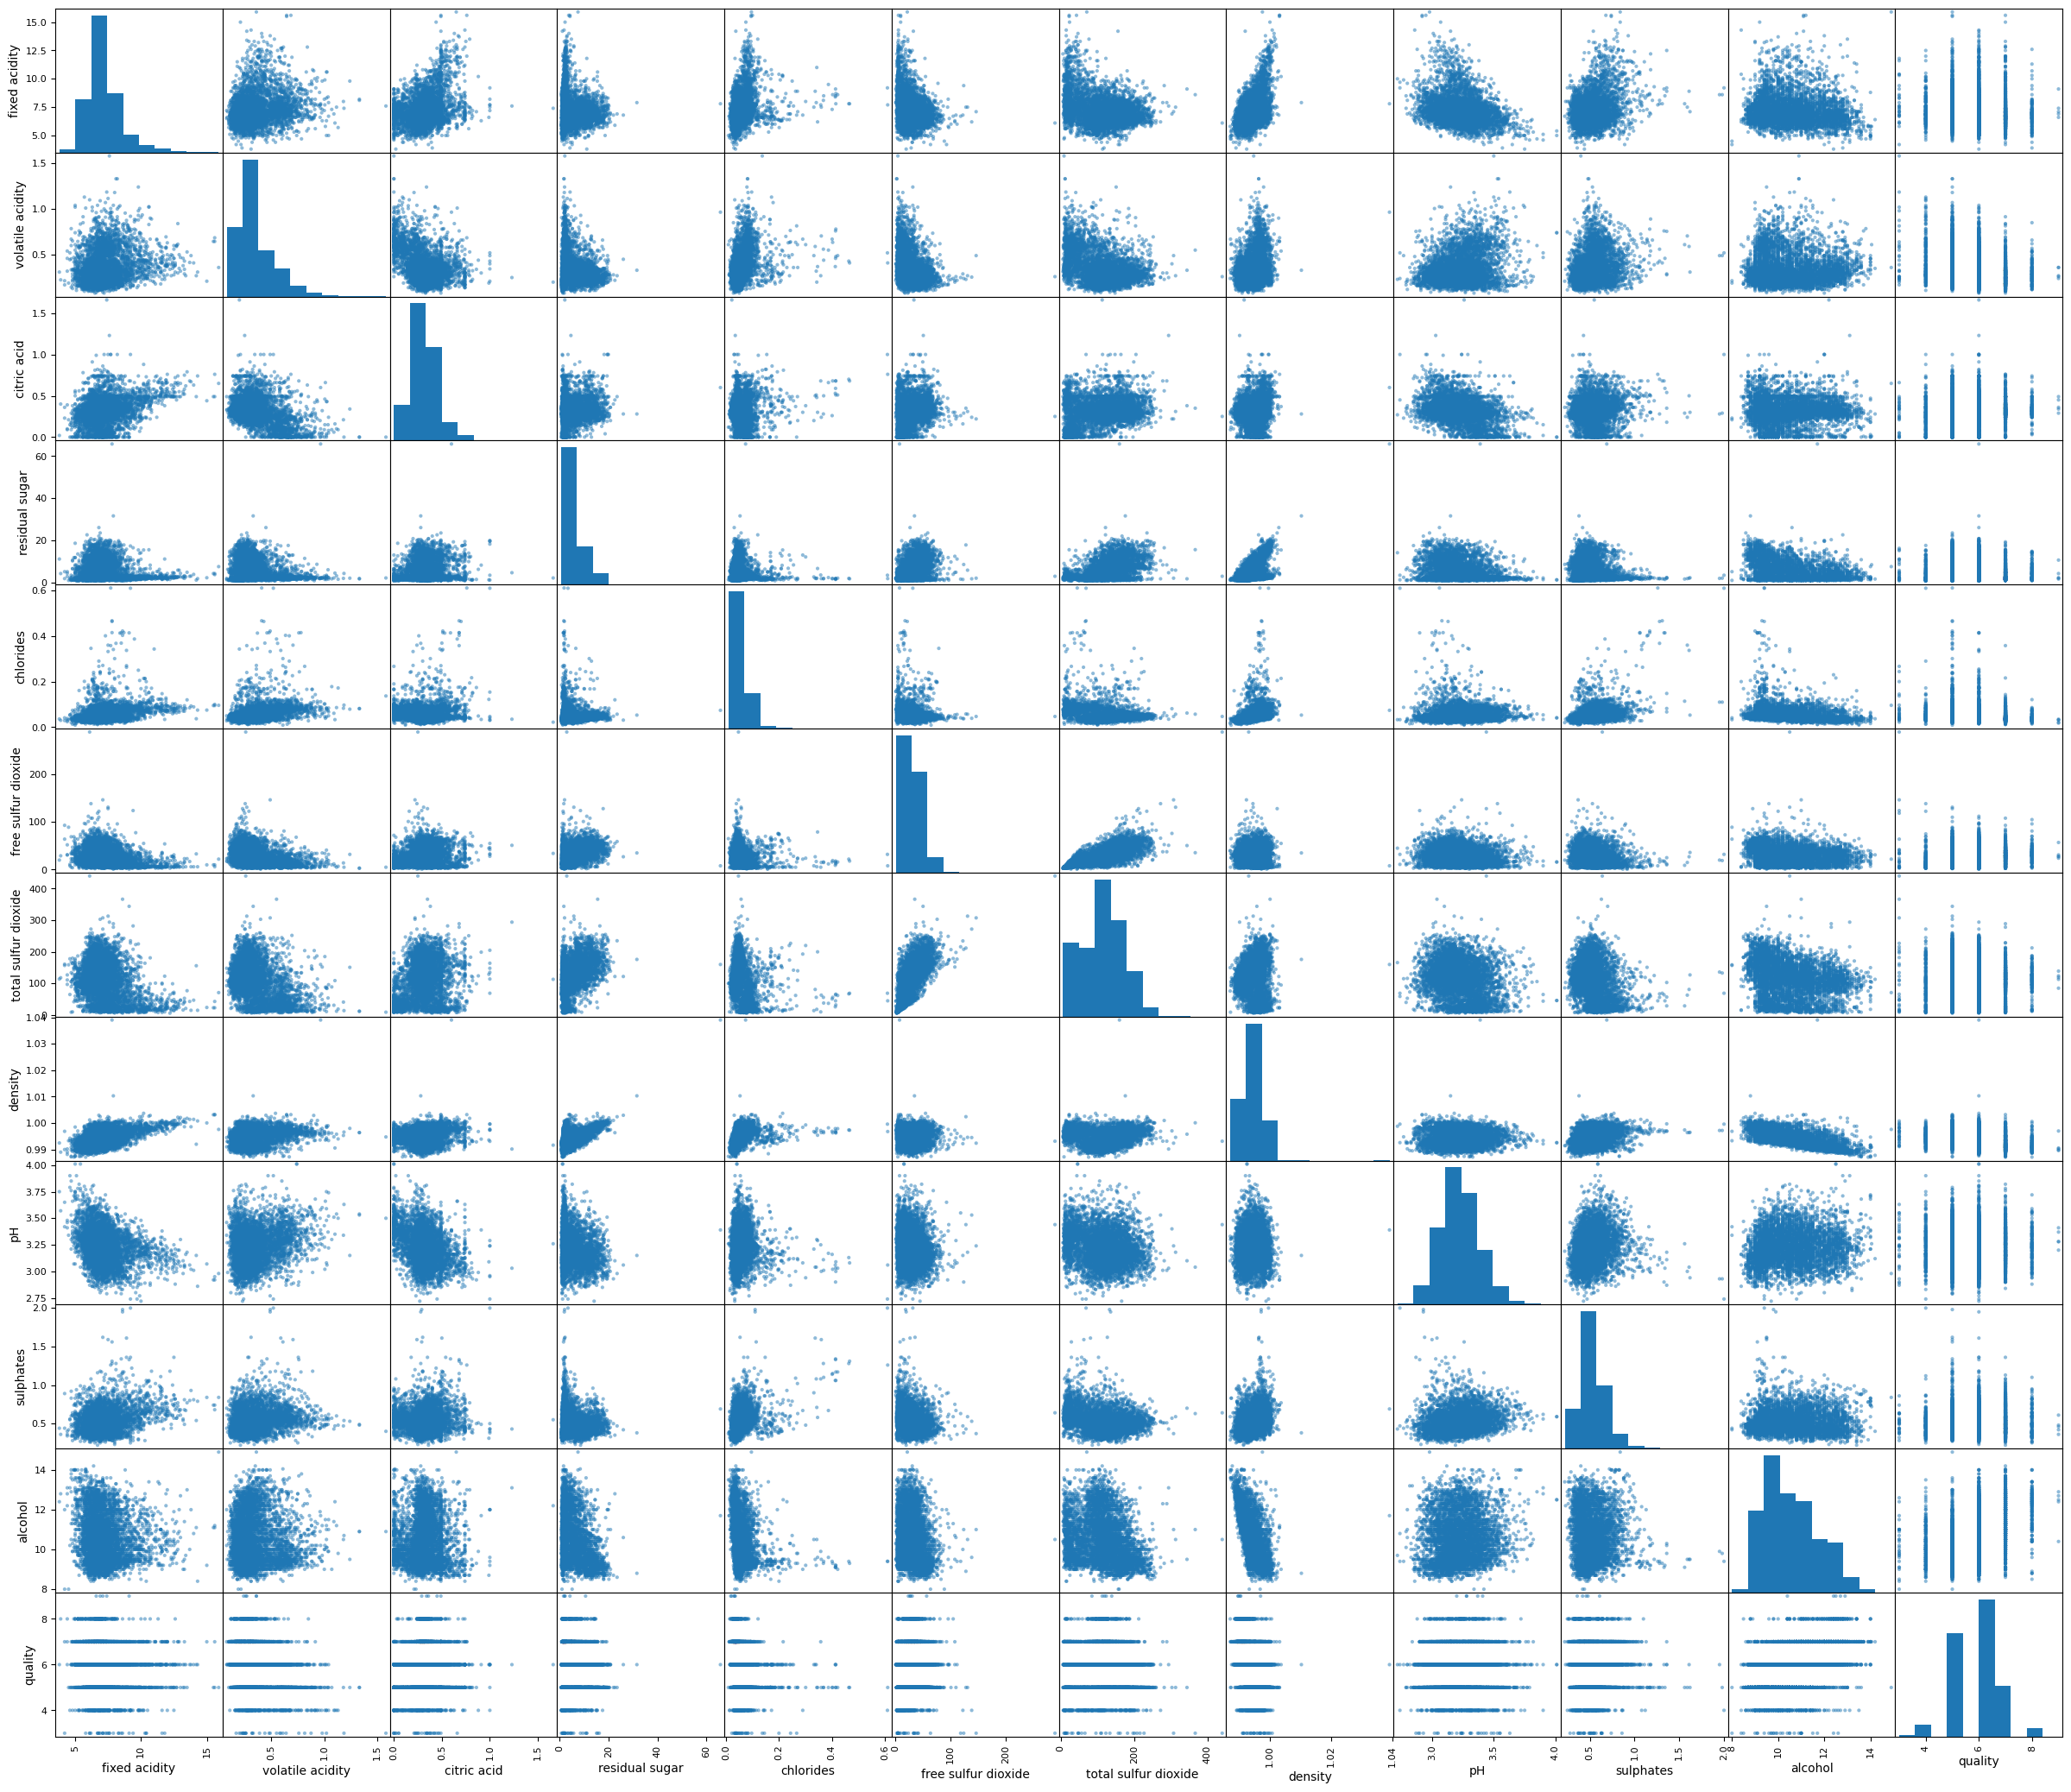

In [ ]:
# Scatterplot matrix for red wine
scatter_matrix(wine[num_data_red], figsize=(30,26))

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

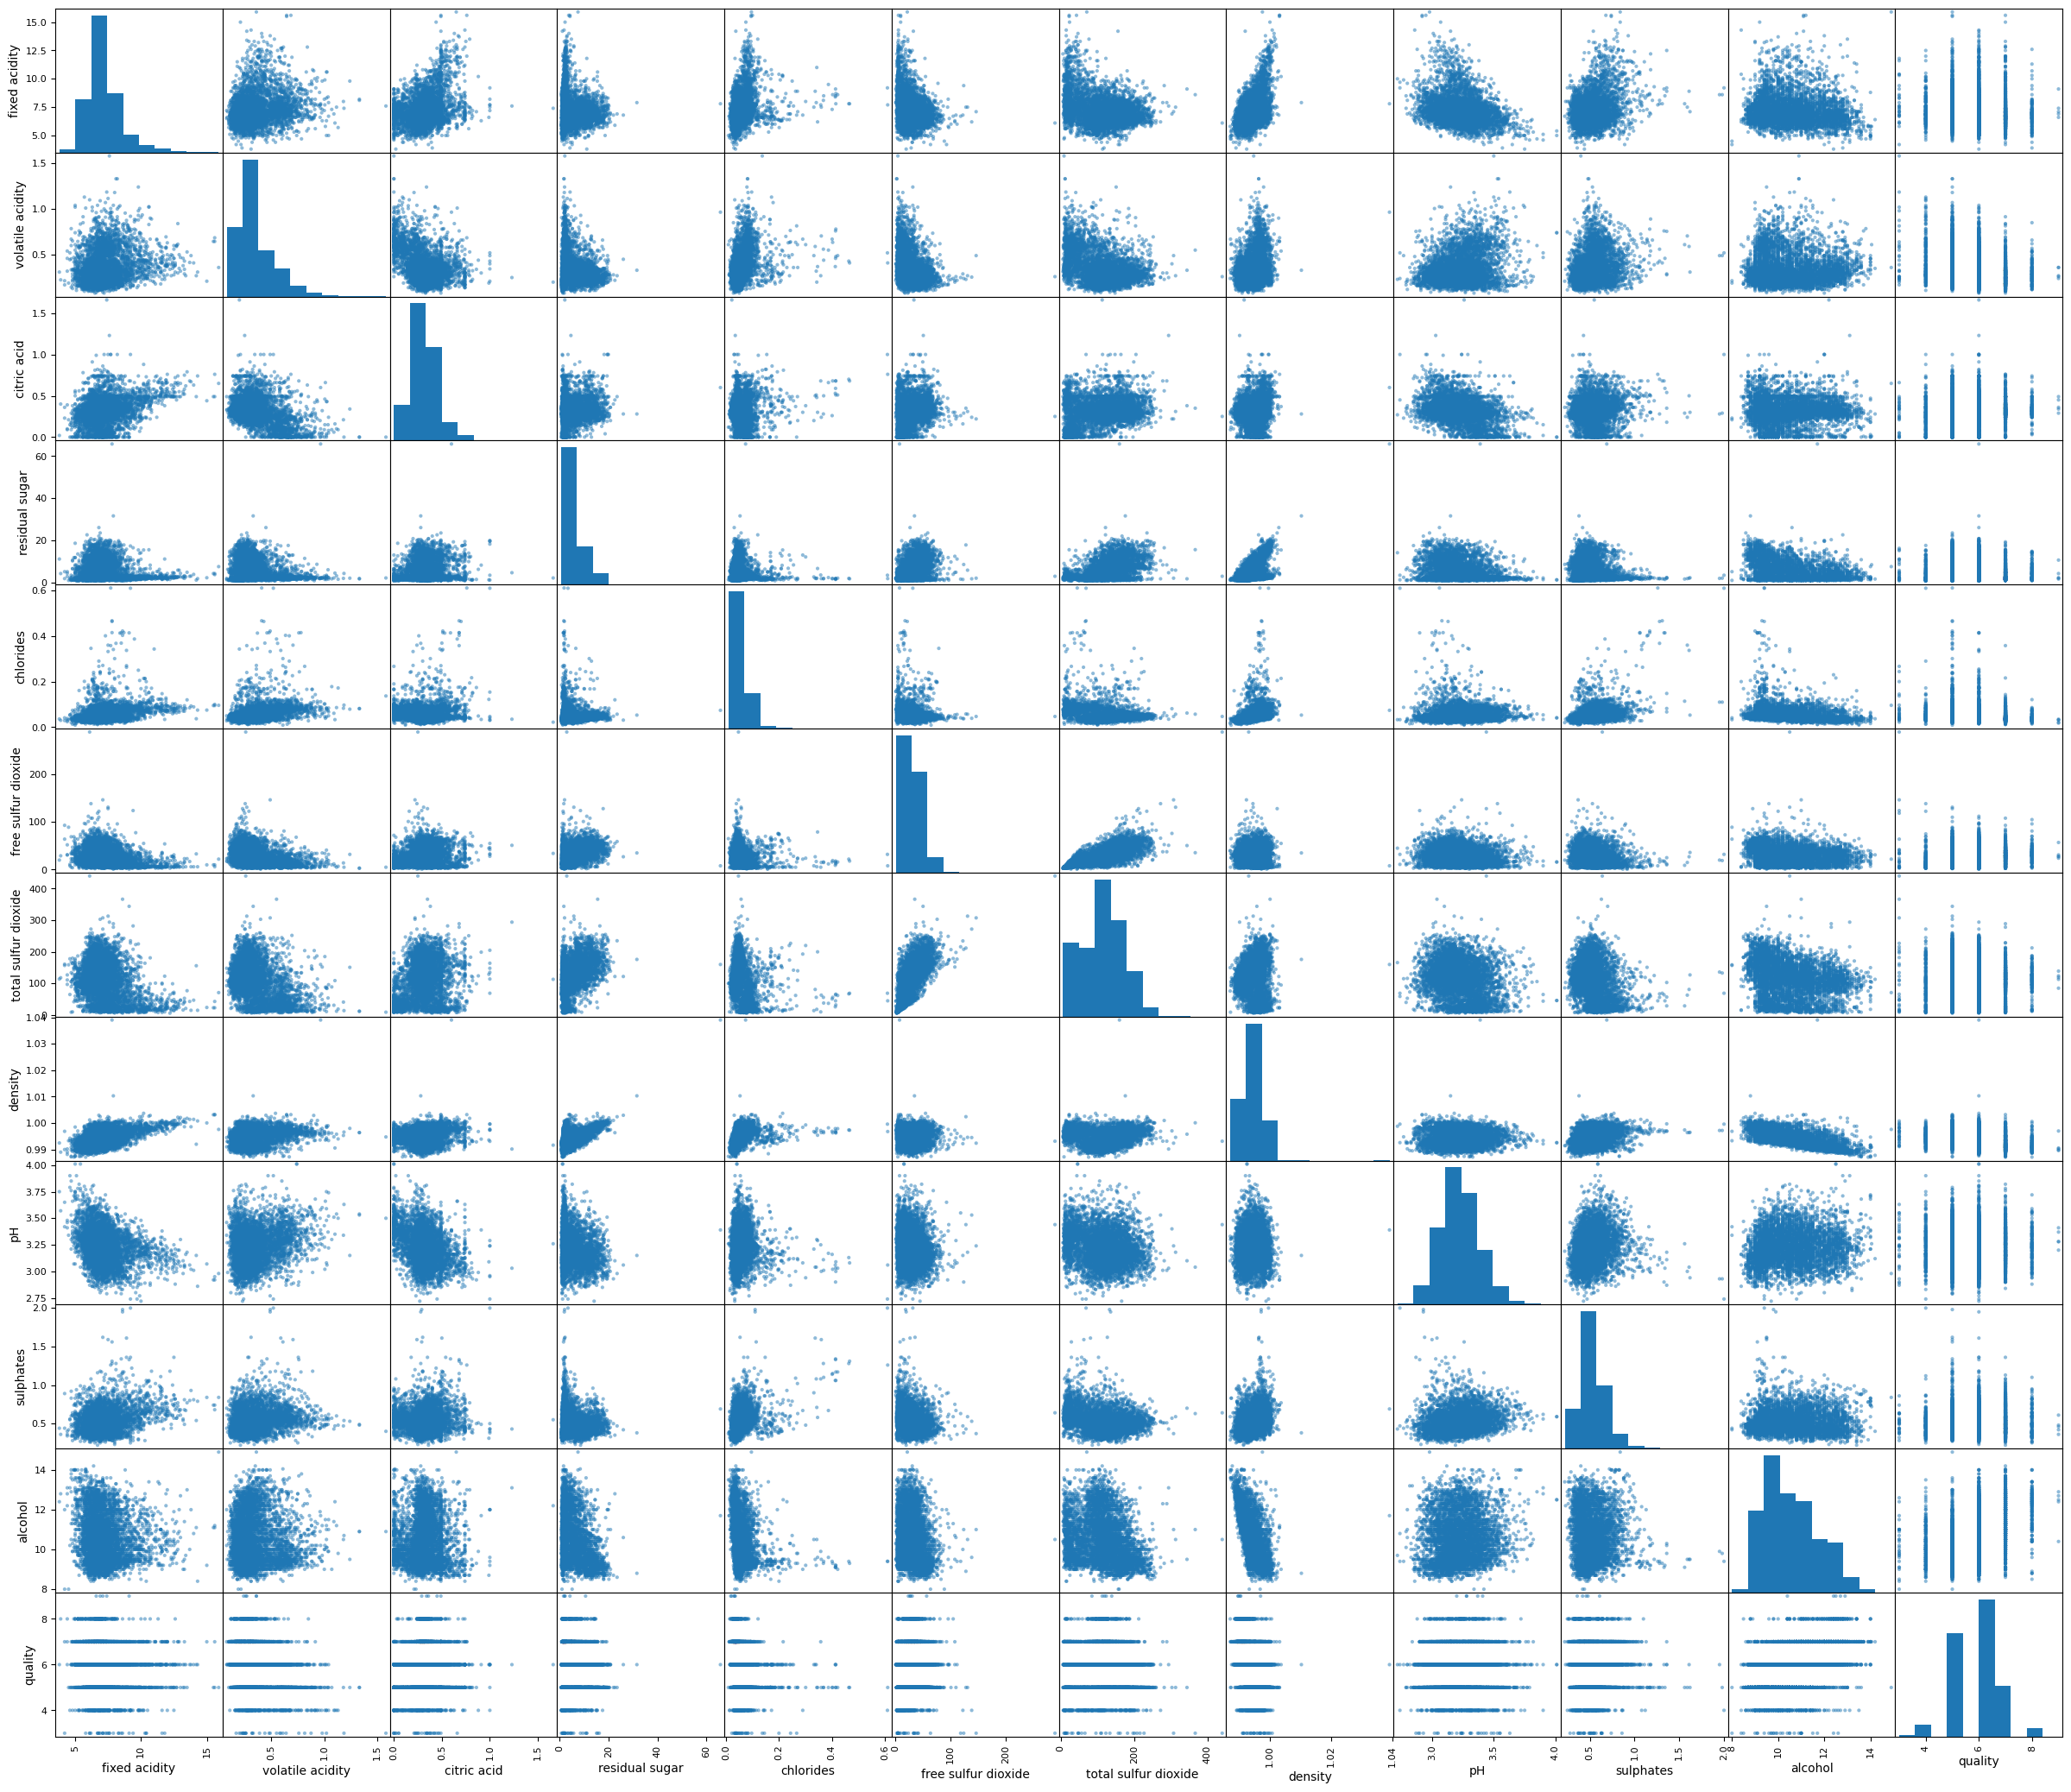

In [64]:
# Scatterplot matrix for white wine
scatter_matrix(wine[num_data_white], figsize=(30,26))

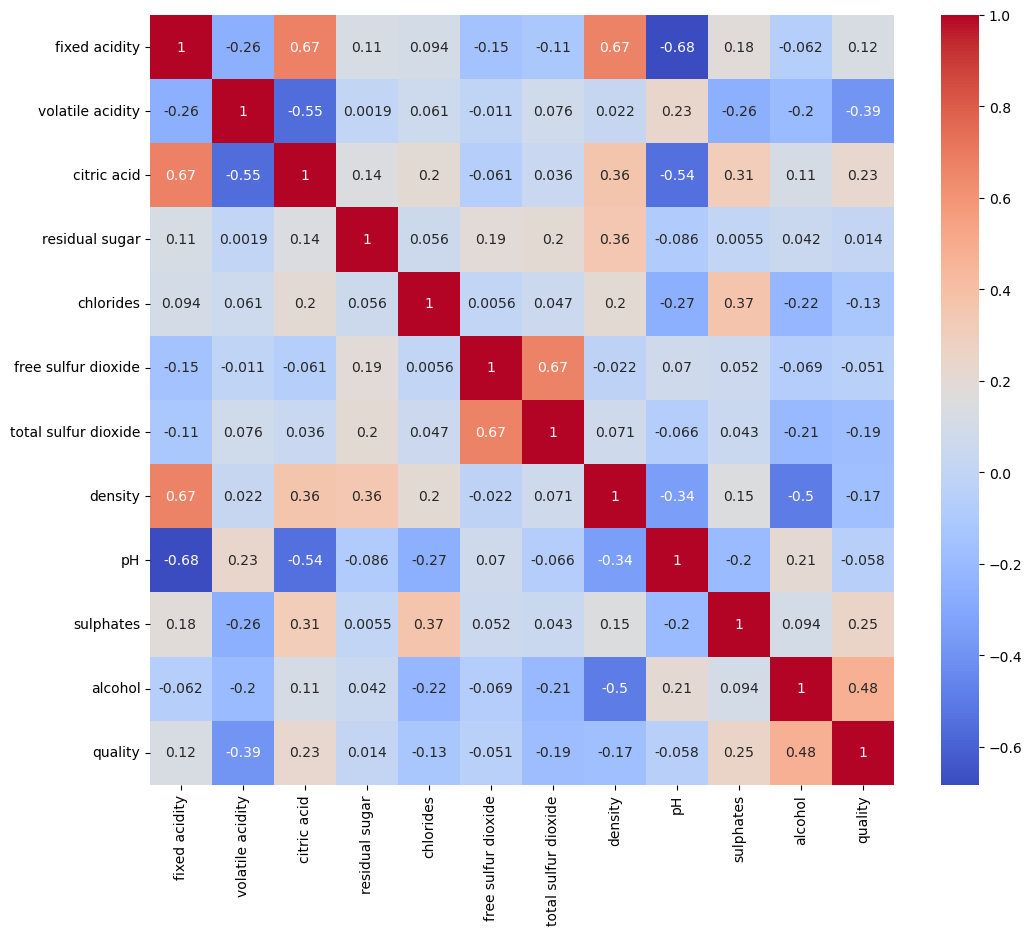

In [ ]:
# Heatmap for red wine
plt.figure(figsize=(12, 10))
sb.heatmap(corr_red, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
# Heatmap for white wine
plt.figure(figsize=(12, 10))
sb.heatmap(corr_white, annot=True, cmap='coolwarm')

plt.show()

NameError: name 'corr_red' is not defined

<Figure size 1200x1000 with 0 Axes>

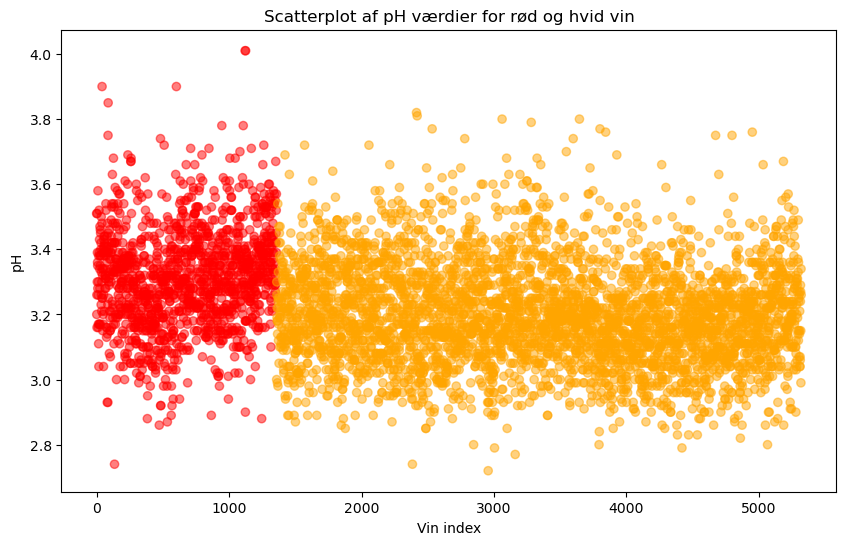

In [33]:
# Scatterplot: x = index (bare rækkefølgen af vin), y = pH
plt.figure(figsize=(10,6))
plt.scatter(wine.index, wine["pH"], alpha=0.5, c=wine["type"].map({"red":"red","white":"orange"}))
plt.xlabel("Vin index")
plt.ylabel("pH")
plt.title("Scatterplot af pH værdier for rød og hvid vin")
plt.show()


## Scaling

In [49]:
print('Mean:', wine['pH'].mean())
print('Standard Deviation:', wine['pH'].std())

Mean: 3.2246635338345864
Standard Deviation: 0.16037920243624496


<Axes: xlabel='pH', ylabel='Count'>

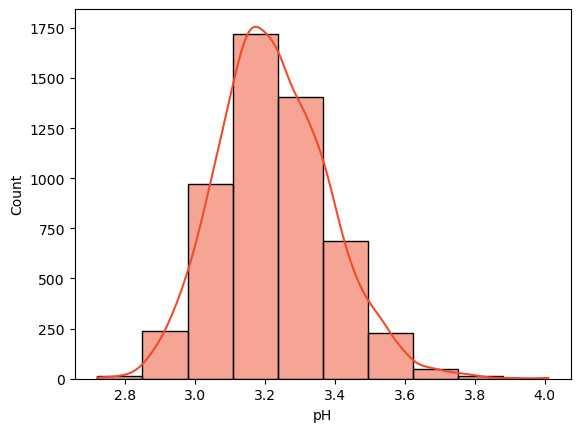

In [51]:
# draw histogram to visualize them
sb.histplot(wine['pH'], color='#ee4c2c', bins=10, kde=True)

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
# reduce all with the mean and scale the data to unit variance
# x = (x-xmean)/std
# copy dataframe for scaling
scaled_data = wine.copy()

standard_scaler = StandardScaler()
scaled_data['pH_scaled'] = standard_scaler.fit_transform(scaled_data[['pH']])

In [57]:
print('Mean:', scaled_data['pH_scaled'].mean())  # should be very close to 0
print('Standard Deviation:', scaled_data['pH_scaled'].std())  # should be very close to 1

Mean: 6.197214838208393e-16
Standard Deviation: 1.000093998214245


<Axes: xlabel='pH_scaled', ylabel='Count'>

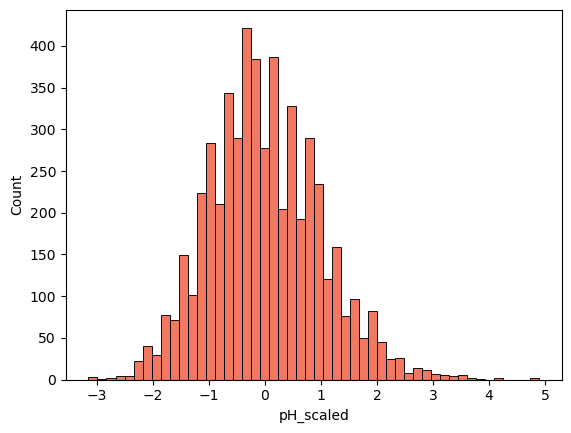

In [58]:
# histogram has same shape, but 0,0 is in the middle
sb.histplot(scaled_data['pH_scaled'], color='#ee4c2c', bins=50)

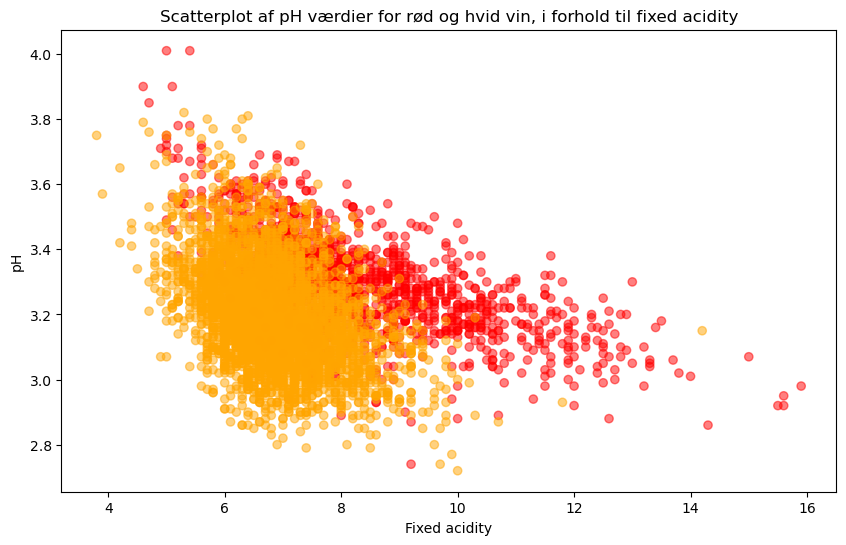

In [34]:
# Scatterplot: x = x = fixed acidity, y = pH
plt.figure(figsize=(10,6))
plt.scatter(wine["fixed acidity"], wine["pH"], alpha=0.5, c=wine["type"].map({"red":"red","white":"orange"}))
plt.xlabel("Fixed acidity")
plt.ylabel("pH")
plt.title("Scatterplot af pH værdier for rød og hvid vin, i forhold til fixed acidity")
plt.show()

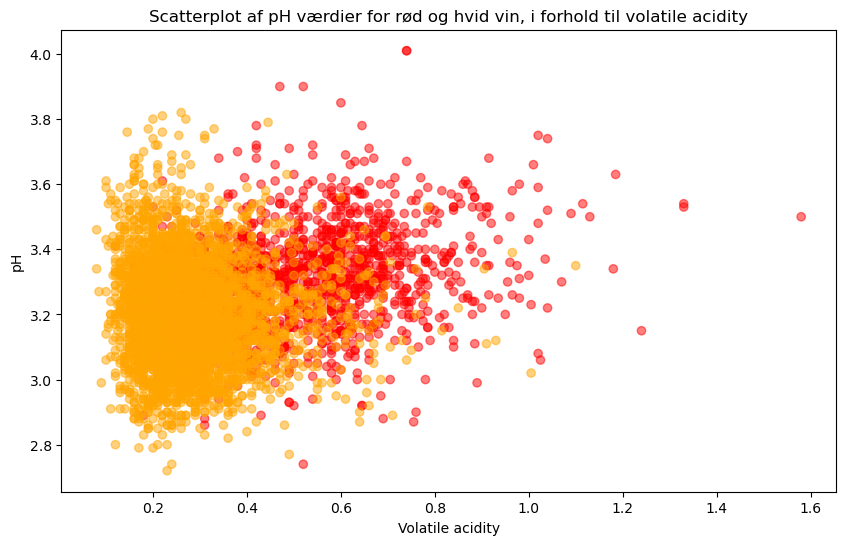

In [35]:
# Scatterplot: x = volatile acidity, y = pH
plt.figure(figsize=(10,6))
plt.scatter(wine["volatile acidity"], wine["pH"], alpha=0.5, c=wine["type"].map({"red":"red","white":"orange"}))
plt.xlabel("Volatile acidity")
plt.ylabel("pH")
plt.title("Scatterplot af pH værdier for rød og hvid vin, i forhold til volatile acidity")
plt.show()

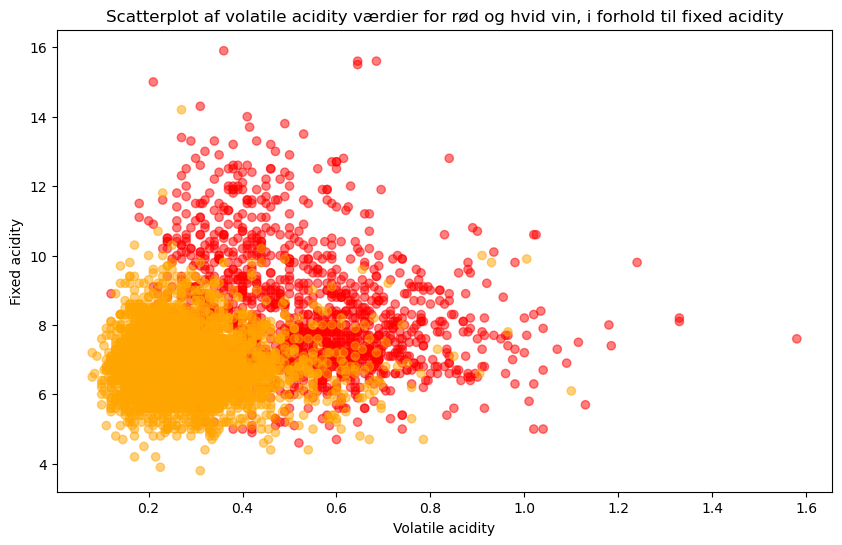

In [36]:
# Scatterplot: x = volatile acidity, y = fixed acidity
plt.figure(figsize=(10,6))
plt.scatter(wine["volatile acidity"], wine["fixed acidity"], alpha=0.5, c=wine["type"].map({"red":"red","white":"orange"}))
plt.xlabel("Volatile acidity")
plt.ylabel("Fixed acidity")
plt.title("Scatterplot af volatile acidity værdier for rød og hvid vin, i forhold til fixed acidity")
plt.show()

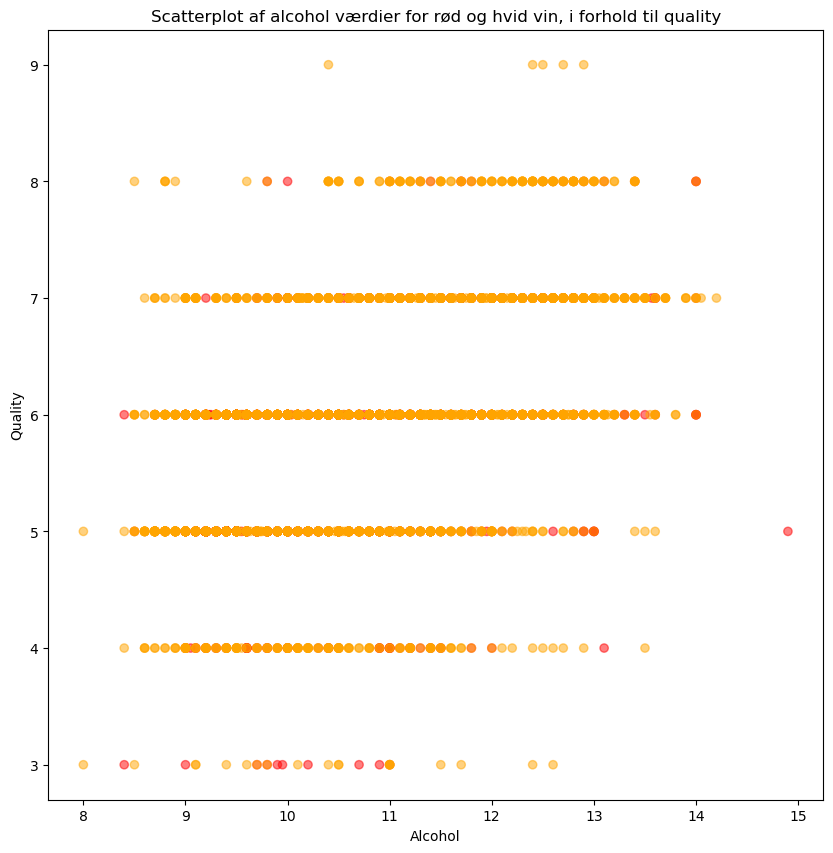

In [37]:
# Scatterplot: x = alcohol, y = quality
plt.figure(figsize=(10,10))
plt.scatter(wine["alcohol"], wine["quality"], alpha=0.5, c=wine["type"].map({"red":"red","white":"orange"}))
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Scatterplot af alcohol værdier for rød og hvid vin, i forhold til quality")
plt.show()

<Figure size 800x600 with 0 Axes>

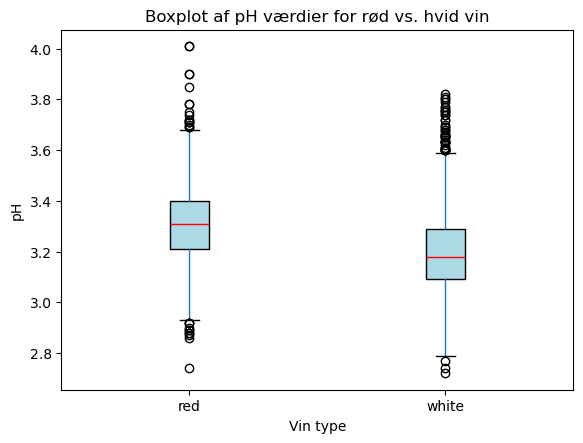

In [38]:
#KOMMER BARE FRA CHAT
plt.figure(figsize=(8,6))
wine.boxplot(column="pH", by="type", grid=False, patch_artist=True,
             boxprops=dict(facecolor="lightblue"),
             medianprops=dict(color="red"))
plt.title("Boxplot af pH værdier for rød vs. hvid vin")
plt.suptitle("")  # fjerner standardtitel
plt.xlabel("Vin type")
plt.ylabel("pH")
plt.show()

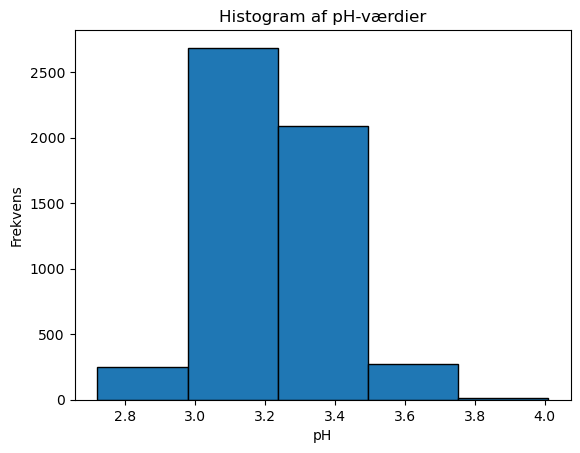

In [39]:
plt.hist(wine["pH"], bins=5, edgecolor="black")
plt.xlabel("pH")
plt.ylabel("Frekvens")
plt.title("Histogram af pH-værdier")
plt.show()

## Animation

In [46]:
# Import Plotly Express
import plotly.express as px

In [ ]:
# Animation with alcohol percentage and density as quality increases
fig = px.scatter(
    wine,
    x="alcohol",
    y="density",
    size="sulphates",
    color="quality",
    animation_frame="quality",      # Each frame corresponds to a quality score
    animation_group="type_encoded", # Keeps points consistent across frames
    hover_name="quality",
    size_max=20,
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={
        "alcohol": "Alcohol %", 
        "density": "Density", 
        "sulphates": "Sulphates", 
        "quality": "Wine Quality"
    },
    title="Wine Features Animated by Quality"
)

# Update layout for better appearance
fig.update_layout(
    xaxis=dict(range=[wine['alcohol'].min()-1, wine['alcohol'].max()+1]),
    yaxis=dict(range=[wine['density'].min()-0.01, wine['density'].max()+0.01])
)

fig.show()